# The structure of a tree

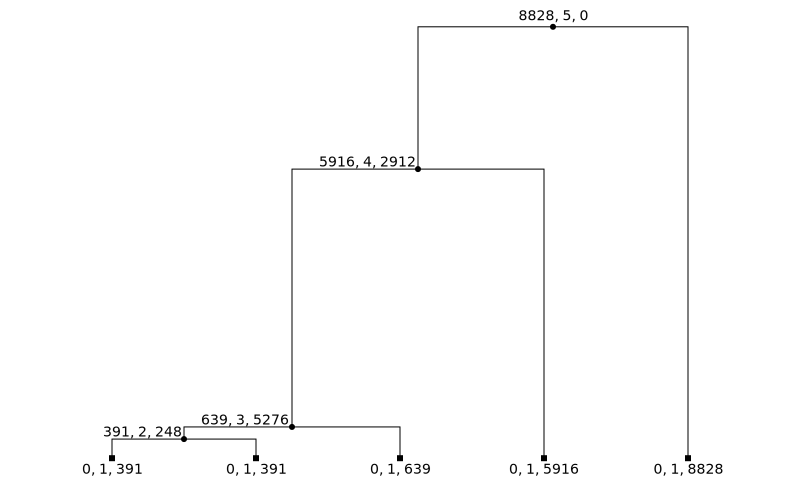

In [1]:
import msprime
import matplotlib.pyplot as plt
from IPython.display import SVG
from myst_nb import glue


ts = msprime.sim_ancestry(
        5, ploidy=1, population_size=10000, random_seed=58185152 
    )
node_labels = {}
t = ts.first() # The first (only!) tree in this ts.
for n in t.nodes():
    blen = t.branch_length(n)
    ntime = t.time(n)
    ndes = t.num_samples(n)
    node_labels[n] = f"{int(ntime)}, {ndes}, {int(blen)}"

glue("tree_structure",
     SVG(ts.draw_svg(size=(800, 500),
     x_scale="treewise",
     x_axis=False,
     node_labels=node_labels)),
     display=False)

````{tabbed} The tree
```{glue:figure} tree_structure
:figwidth: 800
:name: "tree_structure"

The genealogical relationship of five lineages.
It may be simplest to think of a lineage as a haploid lineage.
Alternately, each lineage could be one lineage in a diploid.
For example, the maternal **or** the paternal allele.
Each node is labelled by birth time, number of descendant nodes, and branch length (int time) to the node's parent.
All branch lengths are in *generations*.
By convention, time zero (0) refers to the present.
(Zero generations ago.)
Time *increases* as we move from the present into the past.
```
````

````{tabbed} Details

* This tree is the *genalogical history* of a genomic region of length $L$ units.
* Typically, the units of $L$ will be in *base pairs*.
  But, it could be in more abstract, such as genetic distance.
* If we define a mutation rate, $\mu$ as the expected number of mutations *per unit, per generation*...
* ...then the expected number of mutations on a branch is $B\mu L$, where $B$ is the branch length.
* A mutation on a branch above a node with $d$ descendants affect the character state of all descendants...
* ...unless there's another mutation at the same position on one (or more) descendant lineages.
````

````{tabbed} More details

* It is often convenient to measure time in generations divided by the ploidy times the population size.
* For example, in a diploid population of $N$ indidivuals, we may measure time as $\frac{g}{2N}$.
* When we do this, we must also re-scale the mutation rate accordingly.
  Again for diploids, we'd use $2N\mu$.
````